# **PRUEBA: ANÁLISIS ESTADÍSTICO CON PYTHON**
### **Módulo 4: Análisis Estadístico con Python**
#### *Carrera Data Science - G-93 - Desafio Latam*
#### Estudiante: Felipe Leal Arancibia

En esta prueba validaremos los conocimientos adquiridos durante este módulo..

Lee todo el documento antes de comenzar el desarrollo individual, para asegurarte de tener el máximo de puntaje y enfocar bien los esfuerzos.

Tiempo asociado: 2 horas cronológicas

## Descripción

#### La OMS estima que cada año se producen 12 millones de muertes en todo el mundo debido a enfermedades cardíacas, producidas en su gran mayoría por enfermedades cardiovasculares. El pronóstico temprano de las enfermedades cardiovasculares puede ayudar en la toma de decisiones sobre cambios en el estilo de vida en pacientes de alto riesgo y reducir las complicaciones.


#### La base de datos cardio.csv contiene mediciones realizadas a pacientes hace 10 años, entre los cuales se encuentran:

##### ● Sex: M - F
##### ● Age: edad
##### ● Education: codificada, considerando que un valor más alto corresponde a un mayor nivel educativo.
##### ● currentSmoker: si el paciente es o no fumador actual
##### ● cigsPerDay: el número de cigarrillos que la persona fumaba en promedio en un día.
##### ● BPMeds: si el paciente estaba tomando medicamentos para la presión arterial (0: No, 1: Sí)
##### ● prevalenStroke: si el paciente había tenido un accidente cerebrovascular previamente (0: No, 1: Sí)
##### ● prevalentHyp:: si el paciente era hipertenso o no (0: No, 1: Sí)
##### ● diabetes: si el paciente tenía diabetes o no (0: No, 1: Sí)
##### ● totChol: nivel de colesterol total
##### ● sysBP: presión arterial sistólica
##### ● diaBP_BMI: presión arterial diastólica
##### ● BMI: Índice de masa corporal
##### ● heartRate: : ritmo cardíaco
##### ● glucose: nivel de glucosa
##### ● TenYearCHD: se indica si el paciente sufrió o no una enfermedad coronaria en los últimos 10 años.(0: No, 1: Sí)

#### A partir de estos datos, buscaremos realizar algunas descripciones predictivos.

In [2]:
# Primero importar todas las librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm, skew
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    precision_score, roc_auc_score, average_precision_score, 
    roc_curve, precision_recall_curve, auc
)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from imblearn.over_sampling import SMOTE



#### 1. Carga los datos y explóralos. Elimina los datos nulos o incorrectos

In [3]:
# Se carga CSV del desafío
df_cardio = pd.read_csv('cardio.csv')

In [4]:
# Una visualización rápida
df_cardio.head(3)

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


In [5]:
# tipos d edatos
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 529.9+ KB


Parece que está bien organizado en cuanto a tipo de datos. 
- 4238 filas, 
- 16 columnas.

In [6]:
# Revisar si hay valores nulos, ordenados por cantidad
df_cardio.isnull().sum().sort_values(ascending=False)


glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
sex                  0
prevalentHyp         0
prevalentStroke      0
age                  0
currentSmoker        0
diaBP                0
sysBP                0
diabetes             0
TenYearCHD           0
dtype: int64

In [7]:
# Todavía no eliminaré datos nulos, primero avanzaré en la revisión
#df_cardio = df_cardio.dropna()

# RevisarÉ si hay duplicados
df_cardio.duplicated().sum()

np.int64(0)

In [21]:
# Revisar medidas de tendencia central e indicadores de posición
round(df_cardio.describe(),2)

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.00,4133.00,4209.00,4185.00,4238.00,4238.00,4238.00,4188.00,4238.00,4238.00,4219.00,4237.00,3850.00,4238.00
mean,49.58,1.98,9.00,0.03,0.01,0.31,0.03,236.72,132.35,82.89,25.80,75.88,81.97,0.15
std,8.57,1.02,11.92,0.17,0.08,0.46,0.16,44.59,22.04,11.91,4.08,12.03,23.96,0.36
min,32.00,1.00,0.00,0.00,0.00,0.00,0.00,107.00,83.50,48.00,15.54,44.00,40.00,0.00
25%,42.00,1.00,0.00,0.00,0.00,0.00,0.00,206.00,117.00,75.00,23.07,68.00,71.00,0.00
50%,49.00,2.00,0.00,0.00,0.00,0.00,0.00,234.00,128.00,82.00,25.40,75.00,78.00,0.00
75%,56.00,3.00,20.00,0.00,0.00,1.00,0.00,263.00,144.00,89.88,28.04,83.00,87.00,0.00
max,70.00,4.00,70.00,1.00,1.00,1.00,1.00,696.00,295.00,142.50,56.80,143.00,394.00,1.00


Ya se explorará de forma más puntual el datasets.

Por ahora, como primera visualización me gustaría ver la presencia de casos por género, la cual no tiene valores nulos.


In [8]:
cardio_sex = df_cardio['sex'].value_counts()
cardio_sex

sex
F    2419
M    1819
Name: count, dtype: int64

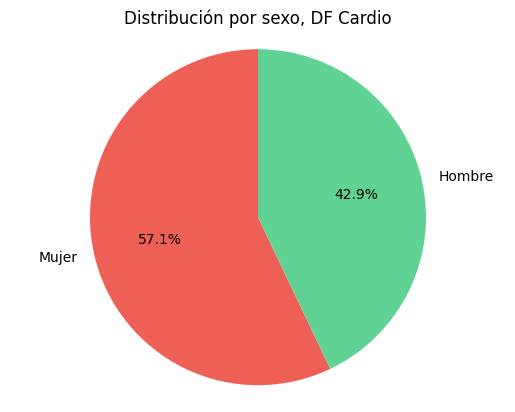

In [9]:
# Se grafica la columna 'sex'
fig, ax = plt.subplots()
ax.pie(cardio_sex, labels=['Mujer', 'Hombre'], autopct='%1.1f%%', startangle=90, colors=["#EE6055","#60D394"])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribución por sexo, DF Cardio')
plt.show() 


De esta forma, se sabe que en la mayor parte de los casos del dataset bruto son mujeres (57%). 

Para segir explorando, haré una separación básica en dos grupos, basados en la definiciones iniciales:
- Variables binarios (booleanas)
- Variables numericas (int y float)



In [21]:
df_cardio_bool = df_cardio[['currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes', 'TenYearCHD']]
df_cardio_bool

,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,No,0.0,0,0,0,0
1,No,0.0,0,0,0,0
2,Yes,0.0,0,0,0,0
3,Yes,0.0,0,1,0,1
4,Yes,0.0,0,0,0,0
...,...,...,...,...,...,...
4233,Yes,0.0,0,1,0,1
4234,Yes,0.0,0,0,0,0
4235,Yes,NaN,0,0,0,0
4236,Yes,0.0,0,0,0,0


In [22]:
df_cardio_bool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   currentSmoker    4238 non-null   object 
 1   BPMeds           4185 non-null   float64
 2   prevalentStroke  4238 non-null   int64  
 3   prevalentHyp     4238 non-null   int64  
 4   diabetes         4238 non-null   int64  
 5   TenYearCHD       4238 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 198.8+ KB


In [23]:
df_cardio_bool.isna().sum().sort_values(ascending=False)

BPMeds             53
currentSmoker       0
prevalentStroke     0
prevalentHyp        0
diabetes            0
TenYearCHD          0
dtype: int64

In [24]:
df_cardio_bool['BPMeds'].unique()
df_cardio_bool['currentSmoker'].unique()

array(['No', 'Yes'], dtype=object)

De esta subconjunto se observa que currentSmoker es object (string) y BPMeds es la única float. Esta última es la que presenta Nan. 
- Se pasa string a int, Yes = 1 y No = 0.
- Se convierte todo el subdata a bool (0 = False; 1 = True).
- Los Nan pasan a ser False, ya que aquí presumo que si no ha declarado es porque no toma.

In [25]:
# Convertir Yes = 1 y No = 0 de df_cardio_bool['currentSmoker']
df_cardio_bool['currentSmoker'] = df_cardio_bool['currentSmoker'].replace({'No': 0, 'Yes': 1})
df_cardio_bool['currentSmoker'].unique() 

/tmp/ipykernel_36241/1701651138.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cardio_bool['currentSmoker'] = df_cardio_bool['currentSmoker'].replace({'No': 0, 'Yes': 1})
/tmp/ipykernel_36241/1701651138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cardio_bool['currentSmoker'] = df_cardio_bool['currentSmoker'].replace({'No': 0, 'Yes': 1})


array([0, 1])

In [26]:
# Convertir en booleanos
df_cardio_bool = df_cardio_bool.astype(bool)

In [27]:
df_cardio_bool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   currentSmoker    4238 non-null   bool 
 1   BPMeds           4238 non-null   bool 
 2   prevalentStroke  4238 non-null   bool 
 3   prevalentHyp     4238 non-null   bool 
 4   diabetes         4238 non-null   bool 
 5   TenYearCHD       4238 non-null   bool 
dtypes: bool(6)
memory usage: 25.0 KB


In [28]:
df_cardio_bool['BPMeds'].unique()


array([False,  True])

In [30]:
df_cardio_bool['currentSmoker'].unique()

array([False,  True])

In [31]:
#Cuadro resumen de este subconjunto: 
cardio_bool = df_cardio_bool.apply(pd.Series.value_counts)
cardio_bool

,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
False,2144,4061,4213,2922,4129,3594
True,2094,177,25,1316,109,644


Ojo, que si valores Nan de columna 'BPMeds' hibiesen pasado a ser True, tampoco hubiese afectado su balance con respecto a otras variables.  (True = 177 + 53 Nan detectados anteriormente = 230, por debajo de columnas 'prevalentHyp' -1316 True- y TenYearCHD -644 True-).

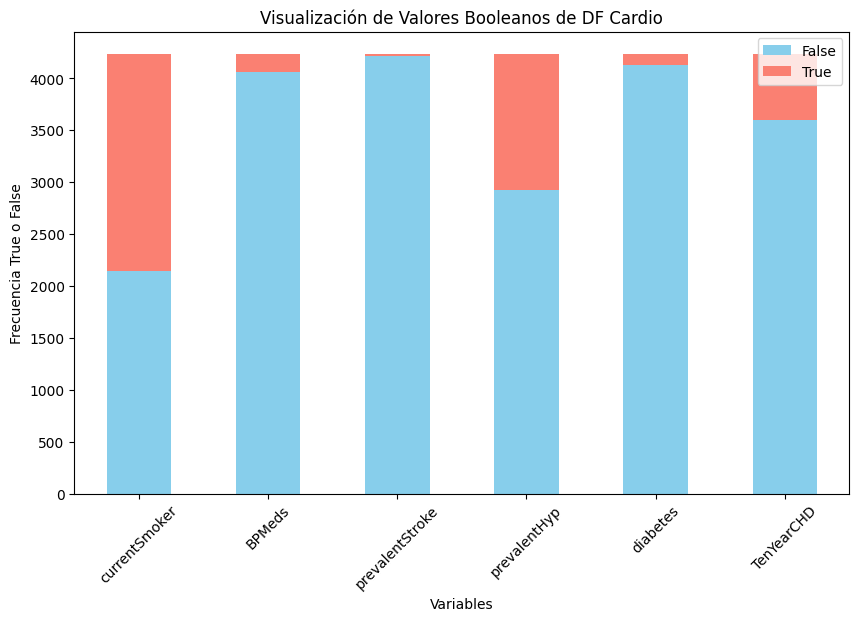

In [32]:
# Grafico ahora los valores booleanos. 
cardio_bool.T.plot(kind="bar", stacked=True, figsize=(10, 6), color=["skyblue", "salmon"])
plt.title("Visualización de Valores Booleanos de DF Cardio")
plt.xlabel("Variables")
plt.ylabel("Frecuencia True o False")
plt.legend(["False", "True"])
plt.xticks(rotation=45)
plt.show()

Podemos ver en esta primera comparativa gráfica que las condiciones de verdad (True, afirmación) más destacadas son:
- pacientes actualmente fumadores (casi 50%).
- pacientes hipertensos, 
- pacientes ya han sufrido alguna actividad coronaria en los útltimos 10 años. 

Ahora exploremos algunas columnas cuantitativas.

In [33]:
df_cardio_num = df_cardio[['age','education','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']]
df_cardio_num

,age,education,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39,4.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,46,2.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,48,1.0,20.0,245.0,127.5,80.0,25.34,75.0,70.0
3,61,3.0,30.0,225.0,150.0,95.0,28.58,65.0,103.0
4,46,3.0,23.0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...
4233,50,1.0,1.0,313.0,179.0,92.0,25.97,66.0,86.0
4234,51,3.0,43.0,207.0,126.5,80.0,19.71,65.0,68.0
4235,48,2.0,20.0,248.0,131.0,72.0,22.00,84.0,86.0
4236,44,1.0,15.0,210.0,126.5,87.0,19.16,86.0,NaN


In [34]:
df_cardio_num.isna().sum().sort_values(ascending=False)

glucose       388
education     105
totChol        50
cigsPerDay     29
BMI            19
heartRate       1
age             0
sysBP           0
diaBP           0
dtype: int64

In [35]:
# Por ahora no sustituiré o reemplazaré los Nan, hasta no tener más antecedentes de qué tan importante es cada variable
# Revisaré medidas de tendencia central e indicadores de posición
round(df_cardio_num.describe(),2)

,age,education,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.00,4133.00,4209.00,4188.00,4238.00,4238.00,4219.00,4237.00,3850.00
mean,49.58,1.98,9.00,236.72,132.35,82.89,25.80,75.88,81.97
std,8.57,1.02,11.92,44.59,22.04,11.91,4.08,12.03,23.96
min,32.00,1.00,0.00,107.00,83.50,48.00,15.54,44.00,40.00
25%,42.00,1.00,0.00,206.00,117.00,75.00,23.07,68.00,71.00
50%,49.00,2.00,0.00,234.00,128.00,82.00,25.40,75.00,78.00
75%,56.00,3.00,20.00,263.00,144.00,89.88,28.04,83.00,87.00
max,70.00,4.00,70.00,696.00,295.00,142.50,56.80,143.00,394.00


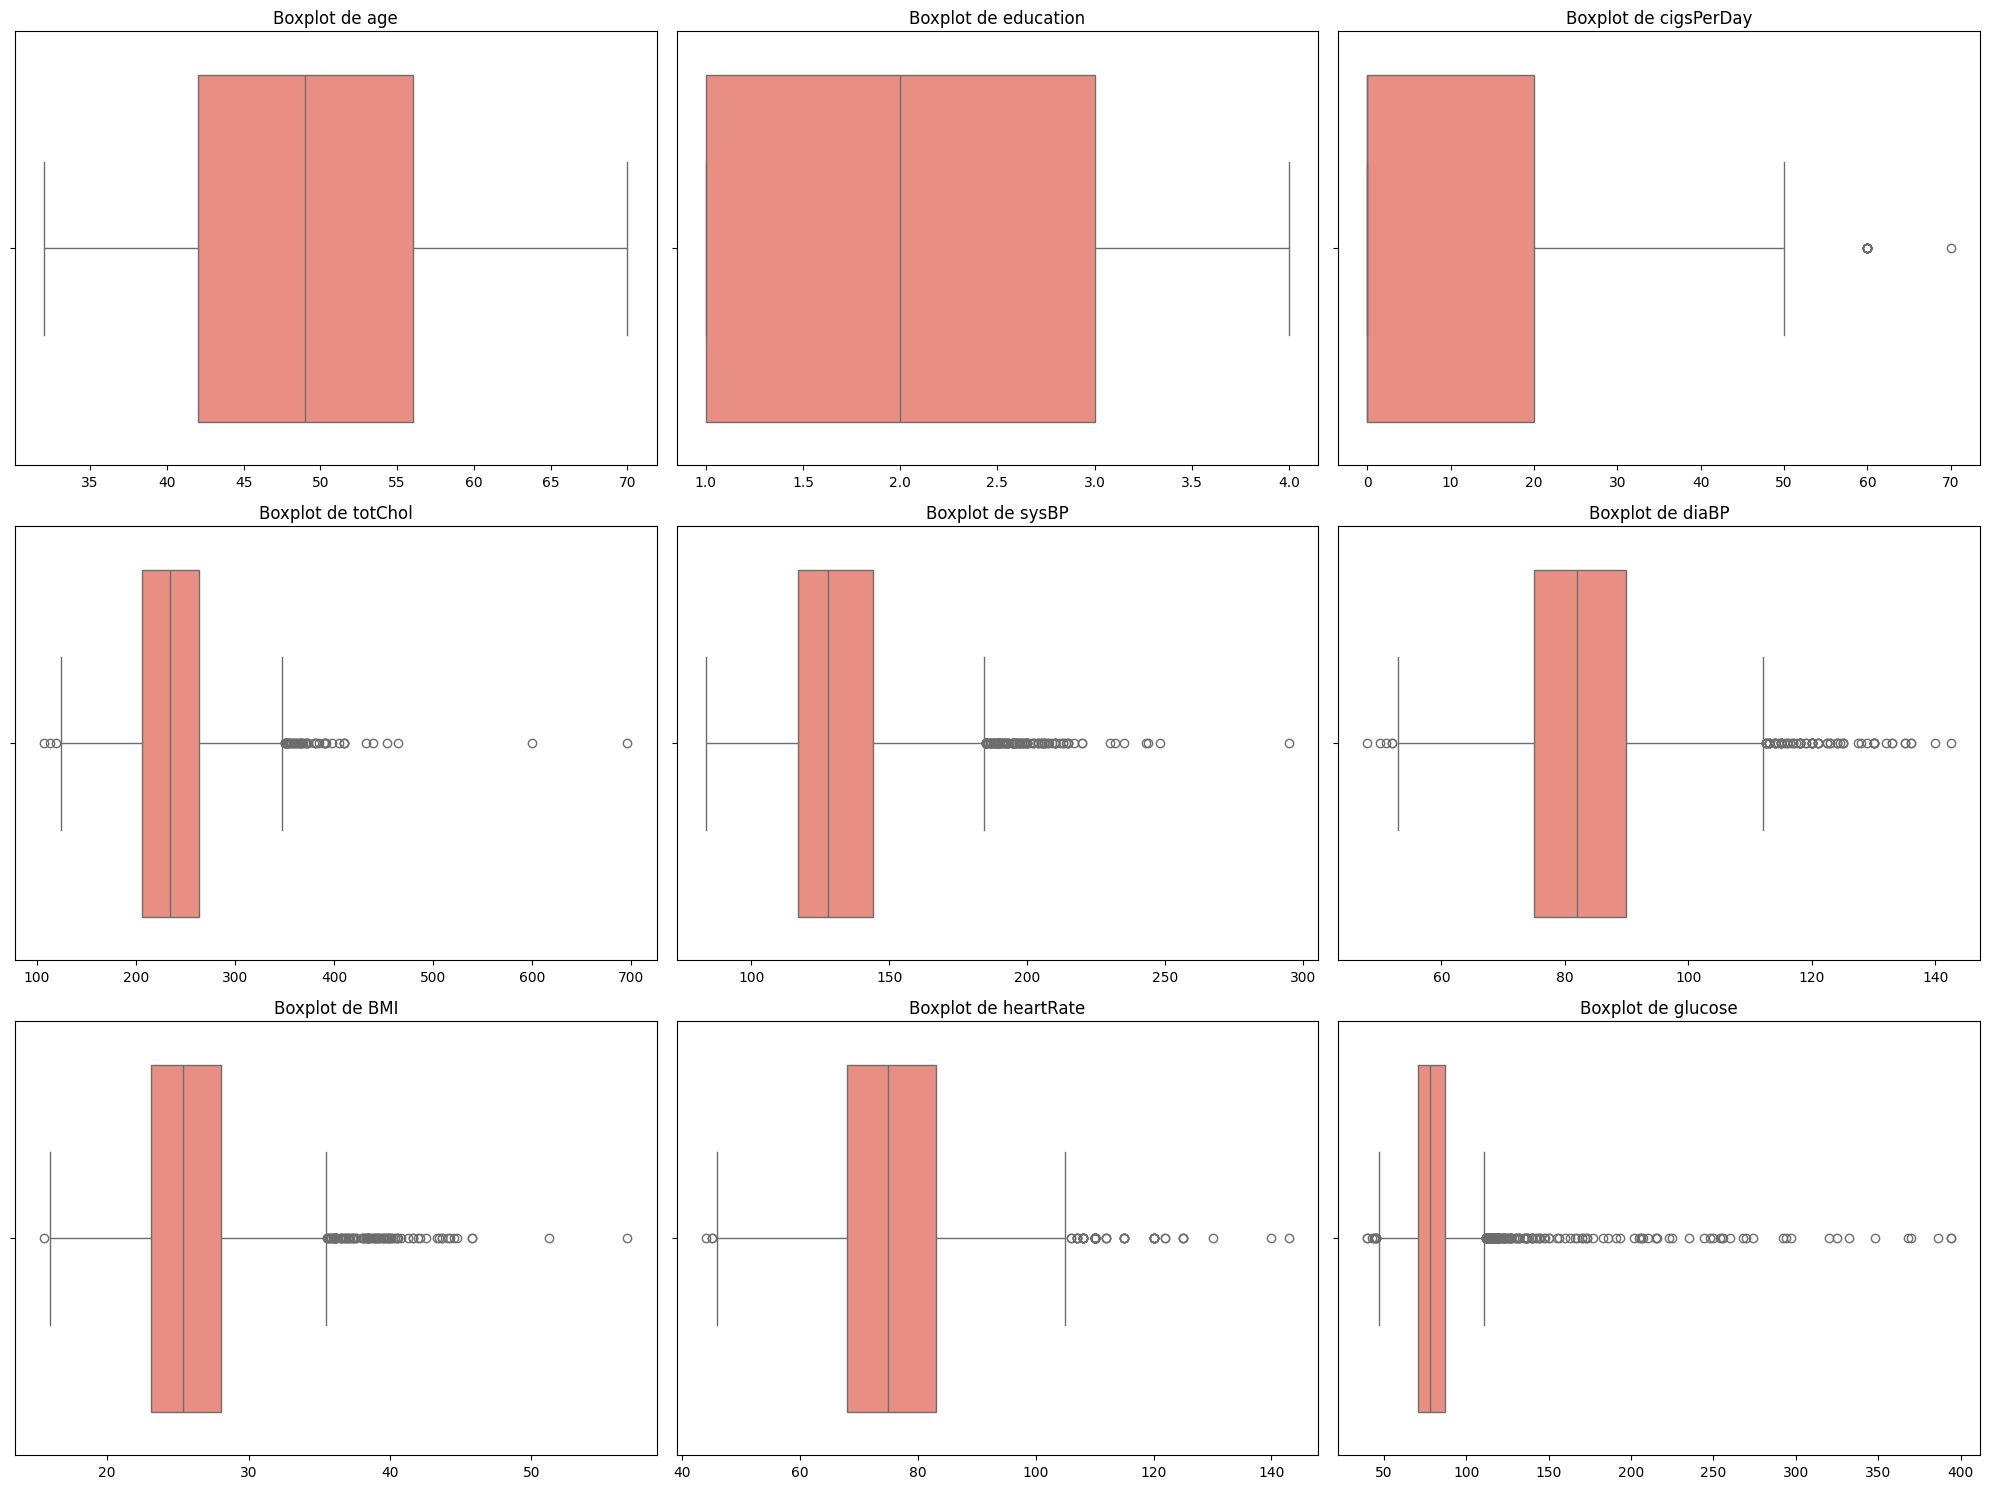

In [36]:
# Para representar este cuadro, exploremos los datos en bruto con un subplots tipo boxplot

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()
for i, col in enumerate(df_cardio_num.columns):
    sns.boxplot(x=df_cardio_num[col], ax=axes[i], color='salmon')
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    plt.tight_layout()


Se puede apreciar, con estos datos en bruto, que existen variables con un gran número de valores atípicos (outliers), como la columna 'glucose', que tiene un extenso espacio entre su bigote superior y sus valores máximos.

Otras columnas, en cambio, pueden tener menos dispersión superior, pero mantienen alta densidad de outliers (ejemplos como sysBP, diaBP).

Se irá limpiando en la medida que se vaya trabajando de forma puntual, para no perder tantos valores antes de explorarla completamente y entender, un poco más, la relevancia de cada columna y sus datos.

#### **2. Escoge tres variables cuantitativas y realiza un análisis descriptivo de ellas, utilizando indicadores y gráficos. ¿Cuaĺ presenta mayor dispersión?**

De las variables que se han explorado hasta el momento, me quedaré con age, education y BMI (índice de masa corporal).

In [37]:
cardio_cuant = df_cardio_num[['age', 'education', 'BMI']]
cardio_cuant.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4238 non-null   int64  
 1   education  4133 non-null   float64
 2   BMI        4219 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 99.5 KB


In [38]:
cardio_cuant.isna().sum().sort_values(ascending=False)

education    105
BMI           19
age            0
dtype: int64

En general, hay pocos registros nulos (caso education: de 4238, sólo 105 Nan).

No eliminaré ni sustituiré ningún Nan, hasta el momento.

In [39]:
# Reviso los duplicated
cardio_cuant.duplicated().sum()

np.int64(91)

In [40]:
# Sigo revisando
cardio_cuant[cardio_cuant.duplicated()]

,age,education,BMI
716,49,2.0,25.94
800,53,1.0,19.64
826,50,3.0,25.09
869,42,1.0,25.75
1004,43,1.0,22.36
...,...,...,...
4195,40,2.0,22.90
4202,42,2.0,27.01
4204,38,2.0,22.01
4226,58,1.0,26.05


No elimino ningún duplicated, porque corresponden a valores con relaciones distintas por fila.

In [41]:
# Veo tabla y la describo
round(cardio_cuant.describe(), 2)

,age,education,BMI
count,4238.00,4133.00,4219.00
mean,49.58,1.98,25.80
std,8.57,1.02,4.08
min,32.00,1.00,15.54
25%,42.00,1.00,23.07
50%,49.00,2.00,25.40
75%,56.00,3.00,28.04
max,70.00,4.00,56.80


Se ve que los valores media y mediana (50%) de cada columna tienden a ser similares.

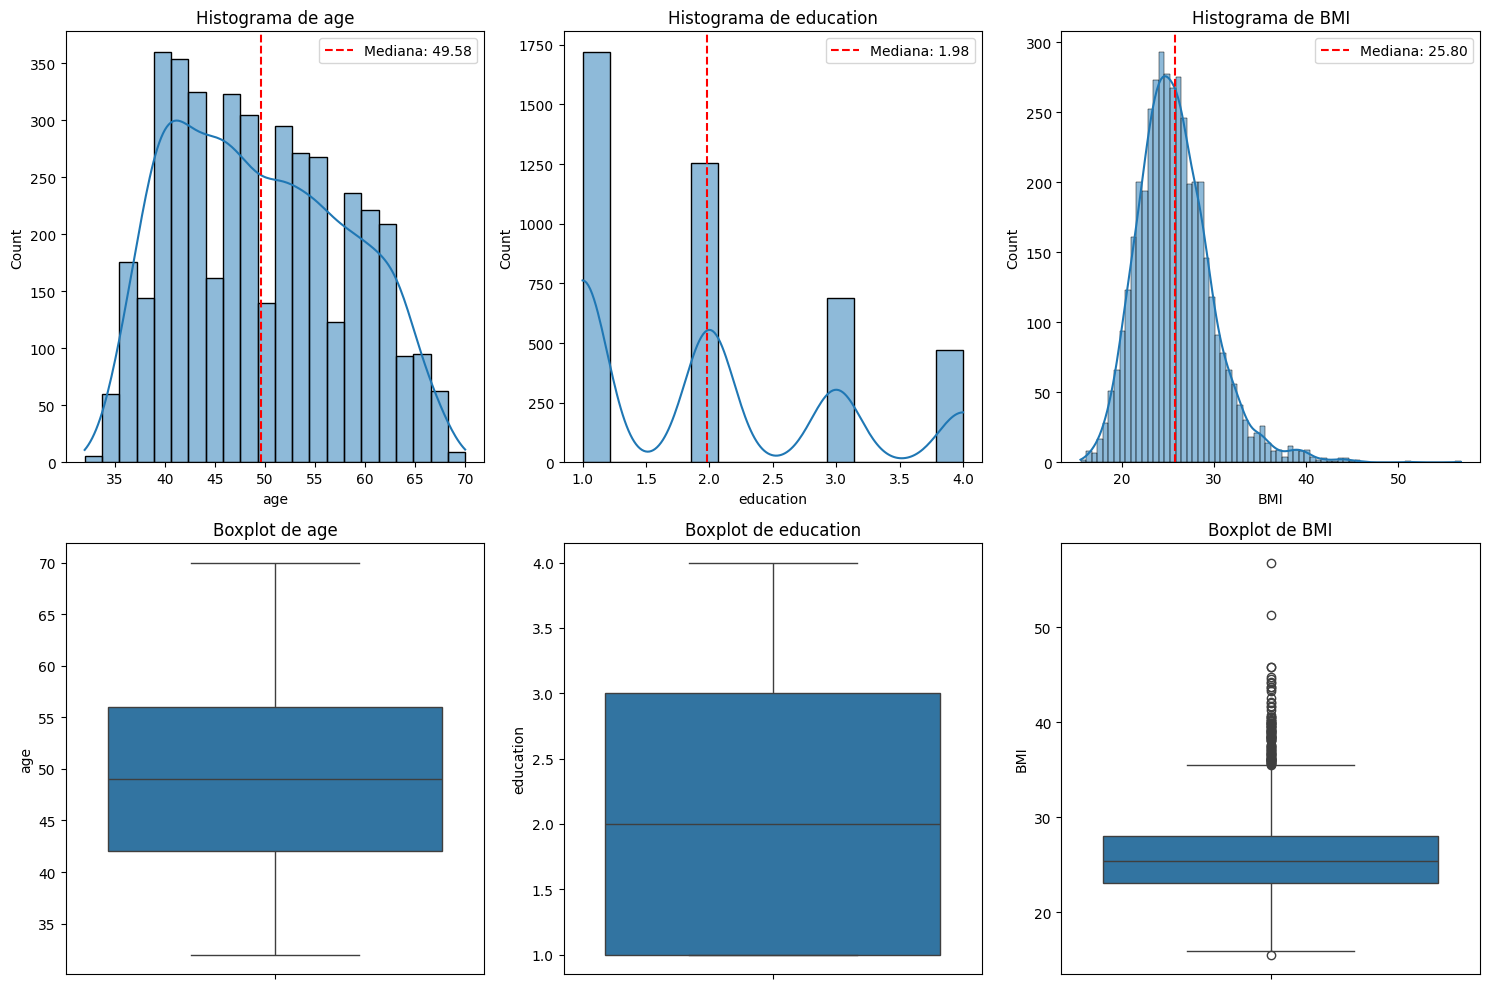

In [42]:
# se muestra un gráfico de dos tipos con valores: histograma (incluye línea PDF para ver distribución)y de caja.
n_columnas = len(cardio_cuant.columns)
fig, axes = plt.subplots(2, n_columnas, figsize=(5 * n_columnas, 10))  # 2 filas, n columnas

for i, columna in enumerate(cardio_cuant.columns):
    sns.histplot(cardio_cuant[columna], kde=True, ax=axes[0, i])
    axes[0, i].axvline(cardio_cuant[columna].mean(), color='red', linestyle='--', label=f'Mediana: {cardio_cuant[columna].mean():.2f}')
    axes[0, i].set_title(f'Histograma de {columna}')
    axes[0, i].legend()
    
    sns.boxplot(y=cardio_cuant[columna], ax=axes[1, i])
    axes[1, i].set_title(f'Boxplot de {columna}')

plt.tight_layout()
plt.show()



Se puede apreciar en los histogramas que:
- Hay un peak en las cercanías de los 40 años de edad. 
- la frecuencia de la educación es decreciente, yendo de bajo nivel educacional (grueso) a alto. 
- el índice de masa tiende a la normal, pero con presencia de valores extremos que afectan la centralidad del gráfico. 


El gráfico de caja, en tanto:
- El 50% de los casos está entre los 40-43 años y los 55-57 años de edad.
- la variable educación concentra un 75% de la muestra en los tres niveles más bajos. 
- confirma que la columna BMI presenta mayor dispersión de datos, conteniendo una alta densidad de outliers fuera del límite superior.  


#### **3. Elimina los datos atípicos del dataset. Para las siguientes preguntas, considera el dataset "limpio"**


En puntos anteriores, a las únicas columnas que se le trataron los datos nulos fueron las booleanas, en particular BPMeds. Esa se traerá al dataframe original, y luego de abordarán los atípicos.

In [45]:
df_cardio[['currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes', 'TenYearCHD']] = df_cardio_bool[['currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes', 'TenYearCHD']]


In [46]:
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   bool   
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4238 non-null   bool   
 6   prevalentStroke  4238 non-null   bool   
 7   prevalentHyp     4238 non-null   bool   
 8   diabetes         4238 non-null   bool   
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   bool   
dtypes: bool(6), float64(8), int64(1), object(1)
memory usage: 35

Antes de limpiar todos los atípicos, limpiaré todos los Nan del df

In [47]:
df_cardio.isna().sum().sort_values(ascending=False)

glucose            388
education          105
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
age                  0
sex                  0
prevalentHyp         0
prevalentStroke      0
BPMeds               0
currentSmoker        0
diaBP                0
sysBP                0
diabetes             0
TenYearCHD           0
dtype: int64

In [48]:
df_cardio = df_cardio.dropna()

In [52]:
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3707 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3707 non-null   object 
 1   age              3707 non-null   int64  
 2   education        3707 non-null   float64
 3   currentSmoker    3707 non-null   bool   
 4   cigsPerDay       3707 non-null   float64
 5   BPMeds           3707 non-null   bool   
 6   prevalentStroke  3707 non-null   bool   
 7   prevalentHyp     3707 non-null   bool   
 8   diabetes         3707 non-null   bool   
 9   totChol          3707 non-null   float64
 10  sysBP            3707 non-null   float64
 11  diaBP            3707 non-null   float64
 12  BMI              3707 non-null   float64
 13  heartRate        3707 non-null   float64
 14  glucose          3707 non-null   float64
 15  TenYearCHD       3707 non-null   bool   
dtypes: bool(6), float64(8), int64(1), object(1)
memory usage: 340.3+ 

    Borrar los Nan implica que el DF haya pasado de 4238 a 3707 registros.
- Los duplicados se dejarán.
- El tipo de valores de todas las columnas ya está estandarizado.
- Se procede a abordar valores atípicos de cada columna cuantitativa (9 en total).

In [62]:
# Se actualiza variable con datos numéricos creada anteriormente 
df_cardio_num = df_cardio[['age','education','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']]
round(df_cardio_num.describe(),2)


,age,education,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3707.00,3707.00,3707.00,3707.00,3707.00,3707.00,3707.00,3707.00,3707.00
mean,49.61,1.98,9.01,236.91,132.45,82.93,25.78,75.74,81.86
std,8.58,1.02,11.93,44.23,22.15,12.01,4.07,11.95,23.82
min,32.00,1.00,0.00,113.00,83.50,48.00,15.54,44.00,40.00
25%,42.00,1.00,0.00,206.00,117.00,75.00,23.07,68.00,71.00
50%,49.00,2.00,0.00,234.00,128.00,82.00,25.38,75.00,78.00
75%,56.00,3.00,20.00,263.50,144.00,90.00,28.02,82.00,87.00
max,70.00,4.00,70.00,600.00,295.00,142.50,56.80,143.00,394.00


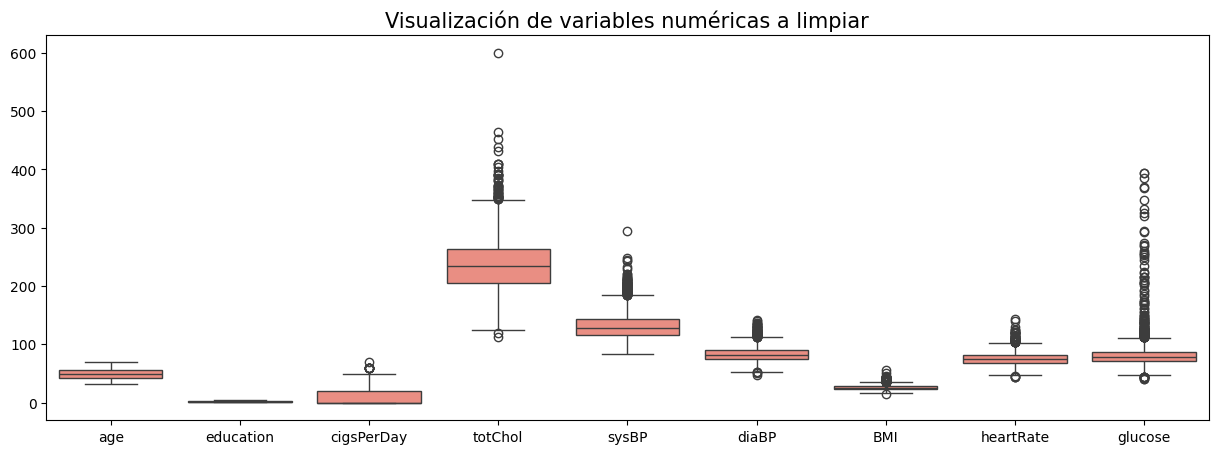

In [71]:
# Visualización general de cajas y outliers de las variables cuantitativas
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_cardio_num, color='salmon')
plt.title('Visualización de variables numéricas a limpiar', fontsize=15)
plt.show()

In [142]:
# Se crea función para limpiar los outliers de forma iterativa
def limpiar_valores_atipicos_iterativo(df, columna):
    """
    Va a retrnar:
    - pd.DataFrame: DataFrame limpio.
    - int: Número de iteraciones necesarias.
    Estos valores se pueden utilizar para evaluar el impacto de la limpieza.
    """
    iteraciones = 0
    while True:
        # Calcular cuartiles y límites
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Identificar valores atípicos
        valores_atipicos = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

        # Si no hay más valores atípicos, detener
        if valores_atipicos.empty:
            break

        # Eliminar valores atípicos
        df = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
        iteraciones += 1

    return df, iteraciones


In [143]:
# Se aplica la función a todas las variables numéricas
for columna in df_cardio_num.columns:
    df_cardio_num2, iteraciones = limpiar_valores_atipicos_iterativo(df_cardio_num, columna)
    print(f"Se necesitaron {iteraciones} iteraciones para limpiar completamente los valores atípicos de la columna: {columna}.")
    print(f"Tamaño del DataFrame tras la limpieza: {df_cardio_num2.shape[0]}\n")



Se necesitaron 0 iteraciones para limpiar completamente los valores atípicos de la columna: age.
Tamaño del DataFrame tras la limpieza: 3707

Se necesitaron 0 iteraciones para limpiar completamente los valores atípicos de la columna: education.
Tamaño del DataFrame tras la limpieza: 3707

Se necesitaron 1 iteraciones para limpiar completamente los valores atípicos de la columna: cigsPerDay.
Tamaño del DataFrame tras la limpieza: 3697

Se necesitaron 2 iteraciones para limpiar completamente los valores atípicos de la columna: totChol.
Tamaño del DataFrame tras la limpieza: 3658

Se necesitaron 4 iteraciones para limpiar completamente los valores atípicos de la columna: sysBP.
Tamaño del DataFrame tras la limpieza: 3551

Se necesitaron 2 iteraciones para limpiar completamente los valores atípicos de la columna: diaBP.
Tamaño del DataFrame tras la limpieza: 3622

Se necesitaron 4 iteraciones para limpiar completamente los valores atípicos de la columna: BMI.
Tamaño del DataFrame tras la l

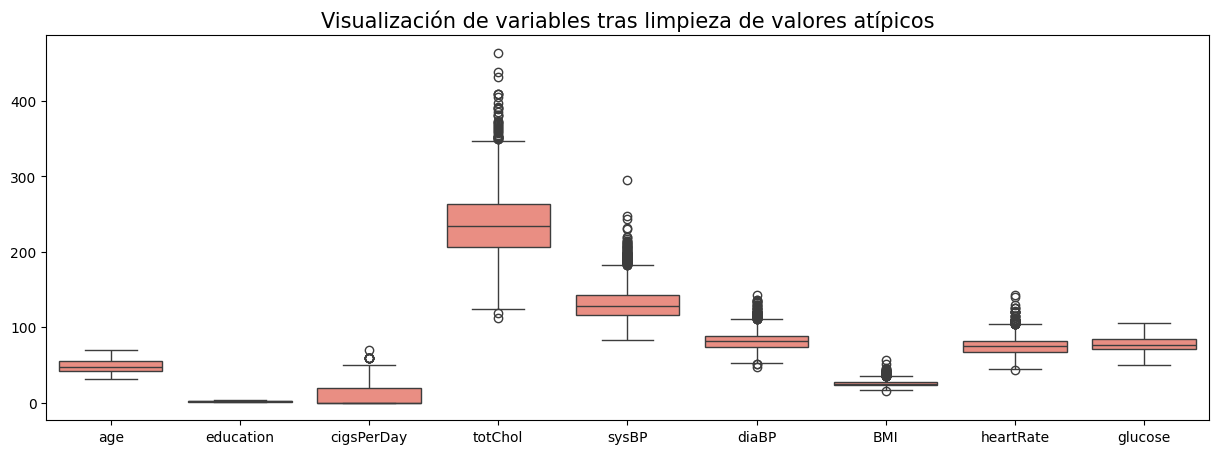

In [144]:
# Visualización general de cajas y outliers de las variables cuantitativas
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_cardio_num2, color='salmon')
plt.title('Visualización de variables tras limpieza de valores atípicos', fontsize=15)
plt.show()


Como quedan todavía mucha densidad de outliers, se aplica nuevamente la función, asumiendo que disminuirá el dataframe.

In [145]:
# Se aplica la función a todas las variables numéricas
for columna in df_cardio_num2.columns:
    df_cardio_num2, iteraciones = limpiar_valores_atipicos_iterativo(df_cardio_num2, columna)
    print(f"Se necesitaron {iteraciones} iteraciones para limpiar completamente los valores atípicos de la columna: {columna}.")
    print(f"Tamaño del DataFrame tras la limpieza: {df_cardio_num2.shape[0]}\n")

Se necesitaron 0 iteraciones para limpiar completamente los valores atípicos de la columna: age.
Tamaño del DataFrame tras la limpieza: 3484

Se necesitaron 0 iteraciones para limpiar completamente los valores atípicos de la columna: education.
Tamaño del DataFrame tras la limpieza: 3484

Se necesitaron 1 iteraciones para limpiar completamente los valores atípicos de la columna: cigsPerDay.
Tamaño del DataFrame tras la limpieza: 3474

Se necesitaron 1 iteraciones para limpiar completamente los valores atípicos de la columna: totChol.
Tamaño del DataFrame tras la limpieza: 3431

Se necesitaron 4 iteraciones para limpiar completamente los valores atípicos de la columna: sysBP.
Tamaño del DataFrame tras la limpieza: 3287

Se necesitaron 1 iteraciones para limpiar completamente los valores atípicos de la columna: diaBP.
Tamaño del DataFrame tras la limpieza: 3254

Se necesitaron 3 iteraciones para limpiar completamente los valores atípicos de la columna: BMI.
Tamaño del DataFrame tras la l

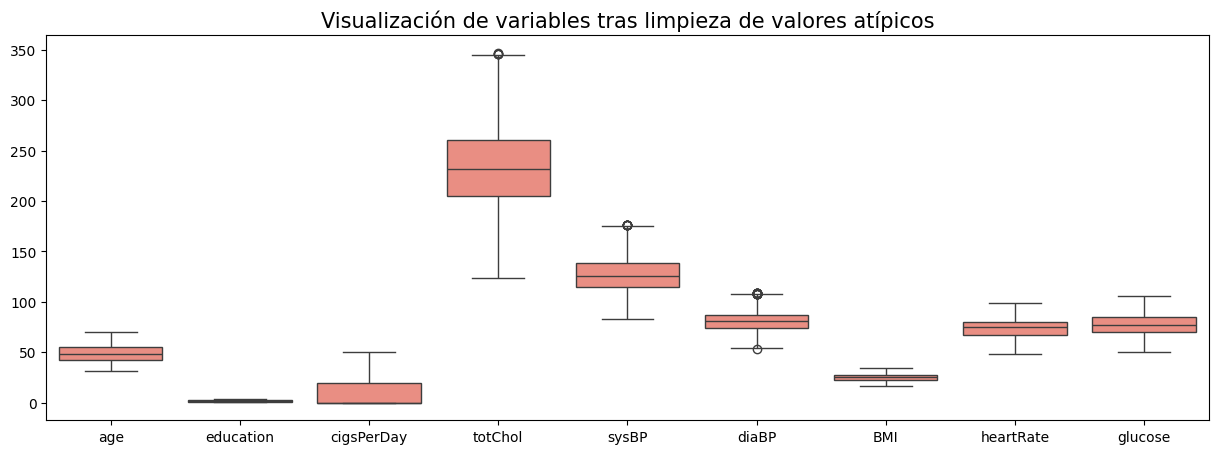

In [146]:
# Visualización general de cajas y outliers de las variables cuantitativas
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_cardio_num2, color='salmon')
plt.title('Visualización de variables tras limpieza de valores atípicos', fontsize=15)
plt.show()

Dato que se siguen visualizando outliers, seguiré aplicando  la función para eliminar todos los datos que puedan afectar futuros ejercicios, asumiendo que disminuirá el tamañ del dataframe.

In [147]:
# Se aplica la función por 3ra vez para limpiar todas las variables numéricas
for columna in df_cardio_num2.columns:
    df_cardio_num2, iteraciones = limpiar_valores_atipicos_iterativo(df_cardio_num2, columna)
    print(f"Se necesitaron {iteraciones} iteraciones para limpiar completamente los valores atípicos de la columna: {columna}.")
    print(f"Tamaño del DataFrame tras la limpieza: {df_cardio_num2.shape[0]}\n")

Se necesitaron 0 iteraciones para limpiar completamente los valores atípicos de la columna: age.
Tamaño del DataFrame tras la limpieza: 3053

Se necesitaron 0 iteraciones para limpiar completamente los valores atípicos de la columna: education.
Tamaño del DataFrame tras la limpieza: 3053

Se necesitaron 0 iteraciones para limpiar completamente los valores atípicos de la columna: cigsPerDay.
Tamaño del DataFrame tras la limpieza: 3053

Se necesitaron 2 iteraciones para limpiar completamente los valores atípicos de la columna: totChol.
Tamaño del DataFrame tras la limpieza: 3043

Se necesitaron 3 iteraciones para limpiar completamente los valores atípicos de la columna: sysBP.
Tamaño del DataFrame tras la limpieza: 3017

Se necesitaron 1 iteraciones para limpiar completamente los valores atípicos de la columna: diaBP.
Tamaño del DataFrame tras la limpieza: 2995

Se necesitaron 3 iteraciones para limpiar completamente los valores atípicos de la columna: BMI.
Tamaño del DataFrame tras la l

In [ ]:
# Se aplica la función por 4ta vez para limpiar todas las variables numéricas
for columna in df_cardio_num2.columns:
    df_cardio_num2, iteraciones = limpiar_valores_atipicos_iterativo(df_cardio_num2, columna)
    print(f"Se necesitaron {iteraciones} iteraciones para limpiar completamente los valores atípicos de la columna: {columna}.")
    print(f"Tamaño del DataFrame tras la limpieza: {df_cardio_num2.shape[0]}\n")

Se necesitaron 0 iteraciones para limpiar completamente los valores atípicos de la columna: age.
Tamaño del DataFrame tras la limpieza: 2987

Se necesitaron 0 iteraciones para limpiar completamente los valores atípicos de la columna: education.
Tamaño del DataFrame tras la limpieza: 2987

Se necesitaron 0 iteraciones para limpiar completamente los valores atípicos de la columna: cigsPerDay.
Tamaño del DataFrame tras la limpieza: 2987

Se necesitaron 0 iteraciones para limpiar completamente los valores atípicos de la columna: totChol.
Tamaño del DataFrame tras la limpieza: 2987

Se necesitaron 0 iteraciones para limpiar completamente los valores atípicos de la columna: sysBP.
Tamaño del DataFrame tras la limpieza: 2987

Se necesitaron 0 iteraciones para limpiar completamente los valores atípicos de la columna: diaBP.
Tamaño del DataFrame tras la limpieza: 2987

Se necesitaron 0 iteraciones para limpiar completamente los valores atípicos de la columna: BMI.
Tamaño del DataFrame tras la l

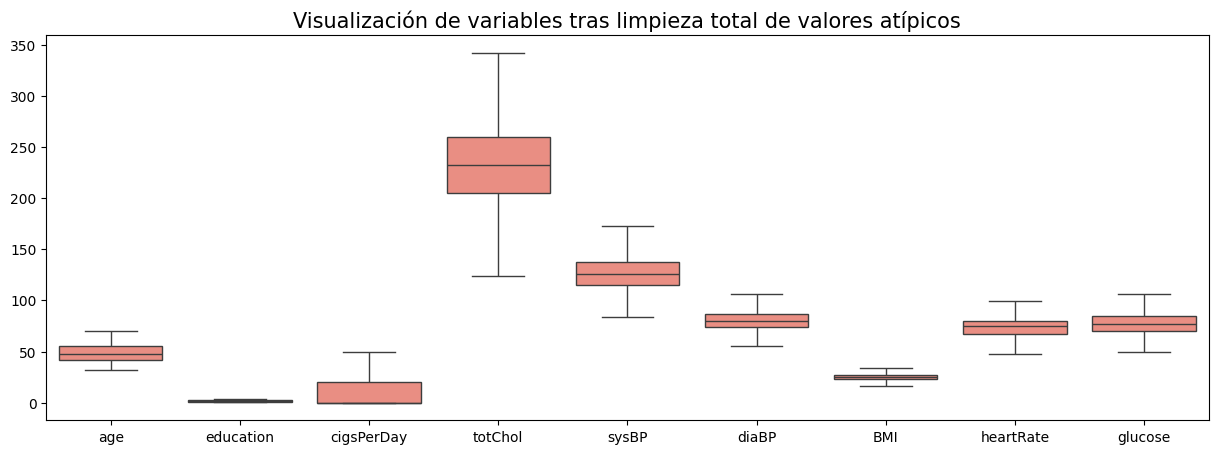

In [150]:
# Visualización general de cajas y outliers de las variables cuantitativas
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_cardio_num2, color='salmon')
plt.title('Visualización de variables tras limpieza total de valores atípicos', fontsize=15)
plt.show()


    Borrar atípicos de forma iterativa implicó que el DF haya pasado de 4238 registros originales, a 3707 tras borrar Nan, hasta llegar a 2987 registros (sin valores atípicos).

- Ahora pasaré el df trabajado al df "original", para realizar los siguientes ejercicios desde allí. 

In [151]:
df_cardio_num2[['age','education','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']].shape

(2987, 9)

In [152]:
df_cardio[['age','education','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']] = df_cardio_num2[['age','education','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']]

In [153]:
# Esta conversión ahora trajo nuevos valores Nan.
df_cardio.isna().sum().sort_values(ascending=False)

age                720
education          720
cigsPerDay         720
glucose            720
BMI                720
diaBP              720
sysBP              720
totChol            720
heartRate          720
prevalentHyp         0
BPMeds               0
currentSmoker        0
sex                  0
prevalentStroke      0
diabetes             0
TenYearCHD           0
dtype: int64

In [154]:
#eliminar Nan 
df_cardio = df_cardio.dropna()

In [157]:
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2987 entries, 0 to 4235
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              2987 non-null   object 
 1   age              2987 non-null   float64
 2   education        2987 non-null   float64
 3   currentSmoker    2987 non-null   bool   
 4   cigsPerDay       2987 non-null   float64
 5   BPMeds           2987 non-null   bool   
 6   prevalentStroke  2987 non-null   bool   
 7   prevalentHyp     2987 non-null   bool   
 8   diabetes         2987 non-null   bool   
 9   totChol          2987 non-null   float64
 10  sysBP            2987 non-null   float64
 11  diaBP            2987 non-null   float64
 12  BMI              2987 non-null   float64
 13  heartRate        2987 non-null   float64
 14  glucose          2987 non-null   float64
 15  TenYearCHD       2987 non-null   bool   
dtypes: bool(6), float64(9), object(1)
memory usage: 274.2+ KB


#### 4. ¿Qué variables cuantitativas presentan mayor correlación? Explica.


Para considerar en este ejercicio a la variable 'sex', se convertirá F (female) = 0 y M (male) = 1, string to int

In [162]:
# convertir a int las columnas que son string: sex (M = 1) y (F=0)
df_cardio['sex'].value_counts()


sex
F    1626
M    1361
Name: count, dtype: int64

In [163]:
# Convertir M = 1 y F = 0 de df_cardio['sex']
df_cardio['sex'] = df_cardio['sex'].map({'F': 0, 'M': 1})

In [164]:
df_cardio['sex'].value_counts()

sex
0    1626
1    1361
Name: count, dtype: int64

In [168]:
# Se crea una variable para almacenar los datos de la matriz de correlación
correlacion = df_cardio.corr()
round(correlacion,2)

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
sex,1.00,0.01,0.00,0.19,0.31,-0.05,0.03,0.04,0.02,-0.04,0.02,0.10,0.16,-0.11,0.00,0.11
age,0.01,1.00,-0.14,-0.20,-0.18,0.10,0.05,0.26,0.03,0.28,0.36,0.17,0.13,-0.04,0.09,0.22
education,0.00,-0.14,1.00,0.01,0.01,0.01,-0.02,-0.05,0.01,-0.01,-0.10,-0.03,-0.10,-0.05,0.01,-0.06
currentSmoker,0.19,-0.20,0.01,1.00,0.79,-0.04,-0.04,-0.08,-0.01,-0.06,-0.12,-0.12,-0.17,0.07,-0.07,0.04
cigsPerDay,0.31,-0.18,0.01,0.79,1.00,-0.03,-0.03,-0.06,-0.01,-0.03,-0.07,-0.06,-0.09,0.09,-0.07,0.07
BPMeds,-0.05,0.10,0.01,-0.04,-0.03,1.00,0.08,0.19,-0.01,0.03,0.14,0.09,0.03,-0.03,-0.00,0.05
prevalentStroke,0.03,0.05,-0.02,-0.04,-0.03,0.08,1.00,0.06,-0.00,0.01,0.06,0.05,0.00,-0.02,-0.00,0.05
prevalentHyp,0.04,0.26,-0.05,-0.08,-0.06,0.19,0.06,1.00,0.05,0.15,0.67,0.57,0.24,0.08,0.06,0.13
diabetes,0.02,0.03,0.01,-0.01,-0.01,-0.01,-0.00,0.05,1.00,0.02,0.04,0.02,-0.01,0.02,0.02,0.00
totChol,-0.04,0.28,-0.01,-0.06,-0.03,0.03,0.01,0.15,0.02,1.00,0.21,0.19,0.16,0.08,0.02,0.08


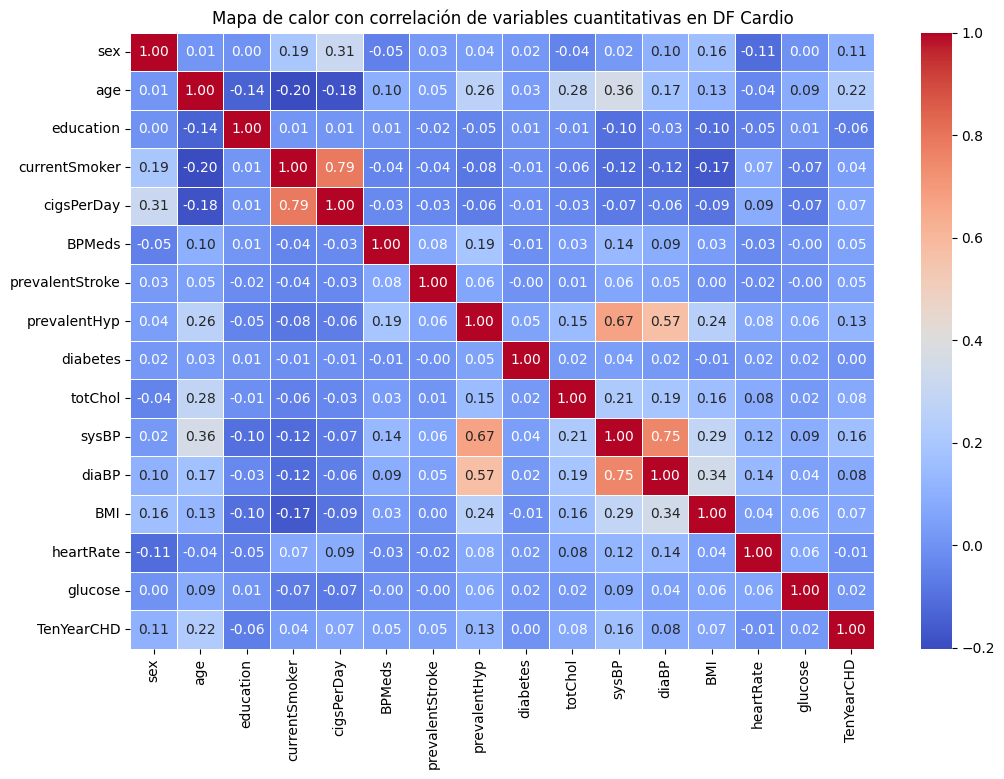

In [170]:
# Para una explicación más gráfica, se puede utilizar un mapa de calor

plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de calor con correlación de variables cuantitativas en DF Cardio')
plt.show()

De acuerdo a los datos entregados, las mayores correlaciones se dan en:
- Fumador actual y Cigarros por día (0.79)
- Presión arterial diastólica y presión arterial sistólica (0.75)
- Hipertensión y presión arterial sistólica (0.67)
- Hipertensión y presión arterial diastólica (0.57)

#### **5. Si de este dataset se escoge un paciente al azar, ¿cuál es la probabilidad de que sea hombre, si se sabe que pertenece al mayor cuartil de la variable correspondiente al índice de masa corporal?**

Para esto, se debe: 

- Filtrar al mayor cuartil (o sea, cuartil 4, sobre 75%) de la columna BMI
- Ver la probabilidad de que sea hombre en esa muestra.

In [189]:
# Exploración inicial
df_cardio['BMI'].describe()

count    2987.000000
mean       25.240258
std         3.335274
min        16.590000
25%        22.900000
50%        25.090000
75%        27.515000
max        34.400000
Name: BMI, dtype: float64

In [173]:
# Se guarda el cuartil superior (Q3) de la variable BMI
imc_3cuartil = df_cardio['BMI'].quantile(0.75)
imc_3cuartil

np.float64(27.515)

In [ ]:
# Se filtra el dataset para obtener los pacientes que pertenecen al cuartilque está por sobre 'imc_3cuartil'
imc_4cuartil = df_cardio[df_cardio['BMI'] > imc_3cuartil]
imc_4cuartil.head(3)

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,0,46.0,2.0,False,0.0,False,False,False,False,250.0,121.0,81.0,28.73,95.0,76.0,False
3,0,61.0,3.0,True,30.0,False,False,True,False,225.0,150.0,95.0,28.58,65.0,103.0,True
6,0,63.0,1.0,False,0.0,False,False,False,False,205.0,138.0,71.0,33.11,60.0,85.0,True


In [183]:
# cantidad de pacientes en el cuartil superior
cant_imc_4cuartil = imc_4cuartil.shape[0]
cant_imc_4cuartil

747

In [180]:
# Se calcula la cantidad de hombres en este subconjunto
hombres_imc_4cuartil = imc_4cuartil[imc_4cuartil['sex'] == 1].shape[0]
hombres_imc_4cuartil

409

In [185]:
# Por último, se caldula la probabilidad condicional
prob_hombre_imc_4cuartil = hombres_imc_4cuartil / cant_imc_4cuartil

round(prob_hombre_imc_4cuartil,2)

0.55

    La probabilidad de que sea paciente hombre y del grupo de IMC más alto (cuarto cuartil), es de 0,55.  

#### **6. ¿Es razonable afirmar que, para una persona cualquiera (no necesariamente dentro del dataset), su ritmo cardiaco promedio es 75? Explica y justifica.**


In [193]:
# Paso a paso recomendado para hacer prueba de hipótesis
# Paso 1: Planteamiento de hipótesis
# Paso 2: Elección nivel de significancia
# Paso 3: Selección y cálculo de un estadístico de prueba
# Paso 4: Determinación de la región crítica - P values
# Paso 5: Toma de decisión

Paso 1: Planteamiento de la hipótesis. 
- Hipótesis nula: Persona cualquiera tiene ritmo cardiaco promedio de 75.
- Hipótesis alternativa: Persona cualquiera tiene ritmo cardiaco promedio distinto a 75.


In [195]:
# Paso 2: Nivel de significancia y datos de entrada


# Se define la media poblacional hipotética de ritmo crdiaco
mu = 75

# Se calcula la media y desviación estándar de la muestra
media_df_rcardiaco = df_cardio['heartRate'].mean()
std_df_rcardiaco = df_cardio['heartRate'].std()
n_muestra = df_cardio['heartRate'].count()

# Nivel de significancia
alpha = 0.05


In [196]:
# Paso 3: Selección y cálculo de un estadístico de prueba

# Se realiza una prueba basándose en que la muestra es mayor a 30, y se conoce el estimador s

# Se calcula el estadístico de prueba z-
z = (media_df_rcardiaco - mu) / (std_df_rcardiaco / np.sqrt(n_muestra))
z


np.float64(-6.186229593142871)

In [202]:
# Paso 4: Determinación de la región crítica - P values

# Otra fórmula para tener z (t_student) y p_value
t_stat, p_value = stats.ttest_1samp(df_cardio['heartRate'], mu)
print(t_stat)
print(p_value)

-6.186229593142871
7.002616995680055e-10


In [209]:
# Paso 5: Toma de decisión
# Decisión basada en el p-valor, si es mayor o menor al nivel de significancia (alpha)

if p_value < alpha:
    print("Se rechaza la hipótesis nula. No es razonable afirmar que el ritmo cardíaco promedio de la población es 75. Es un valor distinto (hipótesis alternativa).")
else:
    print("No rechazamos la hipótesis nula. Es razonable afirmar que el ritmo cardíaco promediode la población  es 75.")

Se rechaza la hipótesis nula. No es razonable afirmar que el ritmo cardíaco promedio de la población es 75. Es un valor distinto (hipótesis alternativa).


#### 7. Ser hombre, ¿influye en el promedio de cigarrillos consumidos por día, dentro de los pacientes fumadores? Explica.


In [9]:
# Filtrar los datos para obtener solo los pacientes fumadores
smokers = df_clean[df_clean['currentSmoker'] == 'Yes']

# Separar los datos en dos grupos: hombres y mujeres
male_smokers = smokers[smokers['sex'] == 'M']['cigsPerDay']
female_smokers = smokers[smokers['sex'] == 'F']['cigsPerDay']

# Calcular las medias y desviaciones estándar de ambos grupos
mean_male = male_smokers.mean()
mean_female = female_smokers.mean()
std_male = male_smokers.std()
std_female = female_smokers.std()

# Realizar la prueba t de dos muestras
t_stat, p_value = stats.ttest_ind(male_smokers, female_smokers)

print(f"Media de cigarrillos por día (hombres): {mean_male:.2f}")
print(f"Media de cigarrillos por día (mujeres): {mean_female:.2f}")
print(f"Desviación estándar (hombres): {std_male:.2f}")
print(f"Desviación estándar (mujeres): {std_female:.2f}")
print(f"Estadística t: {t_stat:.2f}")
print(f"p-valor: {p_value:.4f}")

# Decisión basada en el p-valor
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Ser hombre influye en el promedio de cigarrillos consumidos por día.")
else:
    print("No rechazamos la hipótesis nula. No hay evidencia suficiente para afirmar que ser hombre influye en el promedio de cigarrillos consumidos por día.")

Media de cigarrillos por día (hombres): 22.28
Media de cigarrillos por día (mujeres): 13.79
Desviación estándar (hombres): 10.88
Desviación estándar (mujeres): 8.62
Estadística t: 17.68
p-valor: 0.0000
Rechazamos la hipótesis nula. Ser hombre influye en el promedio de cigarrillos consumidos por día.


#### 8. Construye un modelo de regresión lineal que permita relacionar 6 variables del dataset con el índice de masa corporal. (Debes incluir al menos dos variables cualitativas). Evalúa tu modelo y explica.


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar las variables (incluyendo al menos dos cualitativas)
selected_variables = ['age', 'totChol', 'sysBP', 'heartRate', 'sex', 'currentSmoker']

# Convertir variables cualitativas en variables dummy
df_clean_dummies = pd.get_dummies(df_clean[selected_variables], drop_first=True)

# Definir las variables independientes (X) y la variable dependiente (y)
X = df_clean_dummies
y = df_clean['BMI']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Mostrar los coeficientes del modelo
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 10.24967778347261
R-squared: 0.16491785359080002
                   Coefficient
age                  -0.002296
totChol               0.008723
sysBP                 0.035629
heartRate             0.008264
sex_M                 1.329443
currentSmoker_Yes    -1.154760


#### 9. Construye un modelo de regresión logística para predecir el riesgo de sufrir una enfermedad coronaria en los próximos diez años, a partir de las variables descritas. Verifica el balanceo de datos y evalúa tu modelo.


In [11]:
# Preparar los datos
selected_variables = ['age', 'totChol', 'sysBP', 'heartRate', 'sex', 'currentSmoker']
df_clean_dummies = pd.get_dummies(df_clean[selected_variables], drop_first=True)
X = df_clean_dummies
y = df_clean['TenYearCHD']

# Verificar el balanceo de datos
print(y.value_counts())

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balancear los datos utilizando SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Ajustar el modelo de regresión logística
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_balanced, y_train_balanced)

# Realizar predicciones
y_pred = logistic_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(f"ROC AUC Score: {roc_auc}")

TenYearCHD
0    3004
1     524
Name: count, dtype: int64
Accuracy: 0.7110481586402266
Confusion Matrix:
[[440 160]
 [ 44  62]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       600
           1       0.28      0.58      0.38       106

    accuracy                           0.71       706
   macro avg       0.59      0.66      0.59       706
weighted avg       0.81      0.71      0.75       706

ROC AUC Score: 0.659119496855346


#### 10. Separa los modelos de regresión anteriores en dos distintos, respectivamente, considerando alguna variable categórica. Compara y concluye.

In [12]:
# Separar los datos en dos grupos basados en la variable categórica 'sex'
df_male = df_clean[df_clean['sex'] == 'M']
df_female = df_clean[df_clean['sex'] == 'F']

# Convertir variables cualitativas en variables dummy para ambos grupos
df_male_dummies = pd.get_dummies(df_male[selected_variables], drop_first=True)
df_female_dummies = pd.get_dummies(df_female[selected_variables], drop_first=True)

# Definir las variables independientes (X) y la variable dependiente (y) para ambos grupos
X_male = df_male_dummies
y_male = df_male['BMI']

X_female = df_female_dummies
y_female = df_female['BMI']

# Dividir los datos en conjuntos de entrenamiento y prueba para ambos grupos
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, test_size=0.2, random_state=42)
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal para ambos grupos
model_male = LinearRegression()
model_male.fit(X_train_male, y_train_male)

model_female = LinearRegression()
model_female.fit(X_train_female, y_train_female)

# Realizar predicciones para ambos grupos
y_pred_male = model_male.predict(X_test_male)
y_pred_female = model_female.predict(X_test_female)

# Evaluar el modelo para ambos grupos
mse_male = mean_squared_error(y_test_male, y_pred_male)
r2_male = r2_score(y_test_male, y_pred_male)

mse_female = mean_squared_error(y_test_female, y_pred_female)
r2_female = r2_score(y_test_female, y_pred_female)

print(f"Mean Squared Error (Male): {mse_male}")
print(f"R-squared (Male): {r2_male}")

print(f"Mean Squared Error (Female): {mse_female}")
print(f"R-squared (Female): {r2_female}")

# Mostrar los coeficientes del modelo para ambos grupos
coefficients_male = pd.DataFrame(model_male.coef_, X_male.columns, columns=['Coefficient'])
coefficients_female = pd.DataFrame(model_female.coef_, X_female.columns, columns=['Coefficient'])

print("Coefficients (Male):")
print(coefficients_male)

print("Coefficients (Female):")
print(coefficients_female)

Mean Squared Error (Male): 9.617288384378346
R-squared (Male): 0.0025690807573135466
Mean Squared Error (Female): 11.944705553268369
R-squared (Female): 0.17410997575241272
Coefficients (Male):
                   Coefficient
age                  -0.041044
totChol               0.010005
sysBP                 0.036208
heartRate             0.019571
currentSmoker_Yes    -1.288392
Coefficients (Female):
                   Coefficient
age                   0.020408
totChol               0.004291
sysBP                 0.037986
heartRate             0.006953
currentSmoker_Yes    -1.184555


-
-
-
___0___o___
-
-
-

-
-
-
___0___o___
-
-
-

-
-
-
___0_FiN__o___
-
-
-

### Requerimientos

Dentro del archivo de Jupyter Notebook debes ir ejecutando las siguientes acciones y explicar lo que estás haciendo:

1. Carga, explora y prepara datos para su análisis, utilizando las funciones correspondientes. (2 Puntos)

2. Analiza datos, calculando e interpretando diversos indicadores estadísticos y probabilidades. (2 puntos)

3. Plantea y realiza pruebas de hipótesis e inferencias, interpretando correctamente sus resultados (3 puntos)

4. Plantea y aplica modelos de regresión, e interpreta sus métricas de evaluación (3 Puntos)

¡Mucho éxito!